<a href="https://colab.research.google.com/github/JuanZapa7a/Medical-Image-Processing/blob/main/Google_Notebook_and_Tensorflow_(II).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Create a DataSet from TDFS

## Load a TensorFlow Dataset (TFDS)
The previous lecture a modeled Fashion-MNIST data based on a ***Keras dataset*** was used. However, Keras does not provide biomedical images for studying and practicing. Instead, TensorFlow provides TFDS. In this way, we can load data as a ***TensorFlow dataset (TFDS)*** and convert it into NumPy arrays for very easy processing. We cover TFDS in detail in a later chapter.

For this experiment, we load the colorectal_histology dataset instead of Fashion-MNIST. Once the data is loaded and converted to NumPy, the input pipeline phases are the same as in the previous Lecture.


---
**Create a training set as NumPy arrays in a single batch:** This may take a few minutes.

---



In [ ]:
import tensorflow_datasets as tfds
image_train, label_train = tfds.as_numpy(
    tfds.load(
        'colorectal_histology', split='train',
        batch_size=-1, as_supervised=True,
        try_gcs=True))
type(image_train), image_train.shape

(numpy.ndarray, (5000, 150, 150, 3))

By using `batch_size=-1`, the full dataset is loaded as a single batch. The `tfds.load()` function loads the dataset. The `tfds.as_numpy()` function converts the dataset to NumPy arrays.

The training set contains 5000 150 × 150 images. The *3* dimension indicates that the data is a color image. A **grayscale** image is one in which the only colors are shades of gray. That is, the image only contains luminance (or brightness) information and no color information.

The 'colorectal_histology' dataset has only a training split and does not have a separate split for testing.

---
Create the corresponding test set:

---
``` python
image_test, label_test = tfds.as_numpy(
    tfds.load(
        'colorectal_histology', split='test',
        batch_size=-1, as_supervised=True,
        try_gcs=True))
type(image_test), image_test.shape
```
But this code give error because split is not a automatic set in this dataset.

```
---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<ipython-input-4-a2a47f7dc17c> in <cell line: 1>()
      1 image_test, label_test = tfds.as_numpy(
----> 2     tfds.load(
      3         'colorectal_histology', split='test',
      4         batch_size=-1, as_supervised=True,
      5         try_gcs=True))

16 frames
/usr/local/lib/python3.10/dist-packages/tensorflow_datasets/core/splits.py in _rel_to_abs_instr(rel_instr, split_infos)
    778   split = rel_instr.split_name
    779   if split not in split_infos:
--> 780     raise ValueError(
    781         f'Unknown split {split!r}. Should be one of {list(split_infos)}.'
    782     )

ValueError: Unknown split 'test'. Should be one of ['train'].
```
We need manually split the dataset.

In [ ]:
import tensorflow_datasets as tfds
import numpy as np
from sklearn.model_selection import train_test_split

# Load the dataset
dataset, info = tfds.load('colorectal_histology', split='train', with_info=True)

# to numpy data
data = tfds.as_numpy(dataset)

# Setting images and labels list
images = []
labels = []

for example in data:
    images.append(example['image'])
    labels.append(example['label'])

# list to numpy arrays
images = np.array(images)
labels = np.array(labels)

# split train in 80% train and 20% test
image_train, image_test, label_train, label_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Verify
print("Train Images Shape:", image_train.shape)
print("Test Images Shape:", image_test.shape)



Train Images Shape: (4000, 150, 150, 3)
Test Images Shape: (1000, 150, 150, 3)


## Inspect Shapes and Pixel Intensity

---
**Get training shapes:**

---

In [ ]:
image_train.shape, label_train.shape

((4000, 150, 150, 3), (4000,))

---
**Get test shapes:**

---

In [ ]:
image_test.shape, label_test.shape

((1000, 150, 150, 3), (1000,))

---
Display one sample image

---

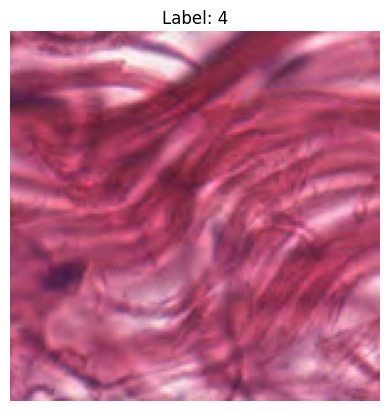

In [ ]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Load the dataset
dataset = tfds.load('colorectal_histology', split='train')

# Take one example from the dataset (the first one)
example = next(iter(dataset))

# Extract the image and label from the example
image, label = example['image'], example['label']

# Display the image
plt.imshow(image)
plt.title(f'Label: {label}')
plt.axis('off')
plt.show()

To get information about the classes in a dataset using TensorFlow Datasets (TFDS), you can load the dataset with with_info=True to access the dataset's metadata. Here’s how you can do it:

In [ ]:
import tensorflow_datasets as tfds

# Cargar el conjunto de datos con información
dataset, info = tfds.load('colorectal_histology', split='train', with_info=True)

# Obtener las clases
classes = info.features['label'].names

# Mostrar las clases
print("Classes:", classes)


Classes: ['tumor', 'stroma', 'complex', 'lympho', 'debris', 'mucosa', 'adipose', 'empty']


**Label: 4** is very confussing. We need take a semantic label.


---

Display one image sample and its label

---



Classes: ['tumor', 'stroma', 'complex', 'lympho', 'debris', 'mucosa', 'adipose', 'empty']


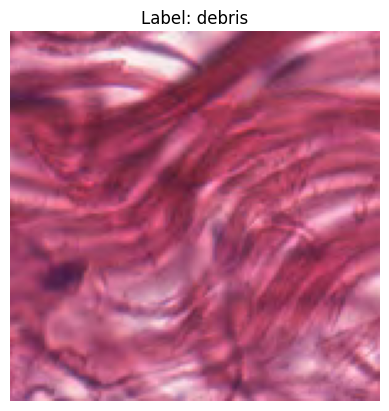

In [ ]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Load the dataset with info
dataset, info = tfds.load('colorectal_histology', split='train', with_info=True)

# Get the class names
classes = info.features['label'].names

# Print the class names
print("Classes:", classes)

# Display an image from the dataset with its label
# Take one example from the dataset
example = next(iter(dataset))

# Extract the image and label from the example
image, label = example['image'], example['label']

# Show the image
plt.imshow(image)
plt.title(f'Label: {classes[label]}')
plt.axis('off')
plt.show()



---
**Display one sample for each class**

---

To get one image and its corresponding class for each class in a dataset using TensorFlow Datasets (TFDS), you can iterate through the dataset and collect one example for each class. Here's how you can do it:
1. Loads the 'colorectal_histology' dataset along with its metadata.
2. Initializes a dictionary to store one example per class.
3. Iterates through the dataset, storing one image and its label for each class.
4. Once all classes have at least one example, it stops iterating.
5. Uses matplotlib to plot the images and display their labels.

Make sure to adjust the plotting layout according to the number of classes to avoid any layout issues. The `plt.subplots` call in this example assumes there are an even number of classes and lays them out in two rows. Adjust the number of rows and columns based on your dataset.




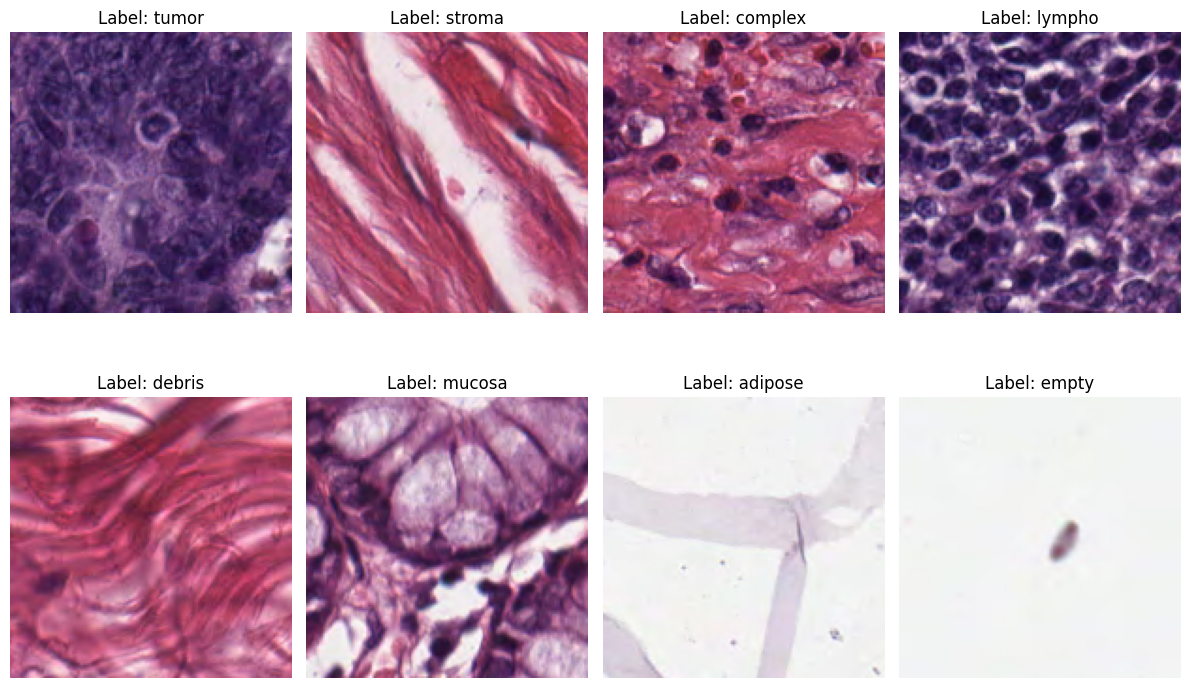

In [ ]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Load the dataset with info
dataset, info = tfds.load('colorectal_histology', split='train', with_info=True)

# Get the class names
classes = info.features['label'].names

# Initialize a dictionary to store one example per class
class_examples = {class_name: None for class_name in classes}

# Iterate through the dataset and collect one example for each class
for example in dataset:
    image, label = example['image'], example['label'].numpy()
    class_name = classes[label]
    if class_examples[class_name] is None:
        class_examples[class_name] = (image, class_name)
    if all(class_examples.values()):
        break  # Stop once we have one example per class

# Plot the images with their labels
num_rows = 2
num_cols = len(classes) // num_rows
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

for idx, (class_name, (image, label)) in enumerate(class_examples.items()):
    row = idx // num_cols
    col = idx % num_cols
    ax = axes[row, col]
    ax.imshow(image)
    ax.set_title(f'Label: {label}')
    ax.axis('off')

plt.tight_layout()
plt.show()


## Scale (normalize)
Since NumPy array values are float, divide them by 255 to normalize the image pixels:

---
**Normalize**

---

In [ ]:
#train_sc = image_train / 255.0
#test_sc = image_test / 255.0

In [ ]:
import tensorflow as tf

train_sc = tf.image.resize(image_train, (64, 64)).numpy() / 255.0
test_sc = tf.image.resize(image_test, (64, 64)).numpy() / 255.0

train_sc[0].shape


(64, 64, 3)

Verify that normalization worked:

---
**Verify normalization**

---

In [ ]:
# Verify the scaling or normalization
print("Training data - min:", np.min(train_sc), "max:", np.max(train_sc))
print("Testing data - min:", np.min(test_sc), "max:", np.max(test_sc))

Training data - min: 0.0 max: 1.0
Testing data - min: 0.0 max: 1.0


This code will output the minimum and maximum values of the scaled training and testing data. If the scaling is correct, the minimum value should be 0.0 (or very close to it), and the maximum value should be 1.0 (or very close to it).

For a more detailed check, you can also inspect the values of a few specific pixels or entire images:

---
**Inspect the values**

---

In [ ]:
# Check a few pixels in the scaled training data
print("Sample pixel values from training data:")
print(train_sc[0, 0, 0])  # Pixel value of the first pixel in the first image
print(train_sc[0, 0, 1])  # Pixel value of the second pixel in the first image
print(train_sc[0, 0, 2])  # Pixel value of the third pixel in the first image

# Check a few pixels in the scaled testing data
print("Sample pixel values from testing data:")
print(test_sc[0, 0, 0])  # Pixel value of the first pixel in the first image
print(test_sc[0, 0, 1])  # Pixel value of the second pixel in the first image
print(test_sc[0, 0, 2])  # Pixel value of the third pixel in the first image


Sample pixel values from training data:
[0.5104444  0.19911535 0.3682263 ]
[0.47667453 0.20743433 0.39174804]
[0.40417814 0.1610409  0.34535462]
Sample pixel values from testing data:
[0.78517926 0.3001915  0.44265473]
[0.7631769  0.28082395 0.42328718]
[0.74752796 0.26565948 0.40481964]


## Prepare Data for TensorFlow Consumption
Slice NumPy arrays into TensorFlow datasets:

---
**Numpy to Tensor**

---

In [ ]:
import tensorflow as tf

train_crht = tf.data.Dataset.from_tensor_slices(
    (train_sc, label_train))
test_crht = tf.data.Dataset.from_tensor_slices(
    (test_sc, label_test))

---
**Inspect**

---

In [ ]:
train_crht, test_crht

(<_TensorSliceDataset element_spec=(TensorSpec(shape=(64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 <_TensorSliceDataset element_spec=(TensorSpec(shape=(64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>)

## Build the Consumable Input Pipeline

---
Initialize parameters, shuffle training data, and batch and prefetch training and test data:

---

In [ ]:
batch_size = 10
shuffle_size = 10000
train_crhtds = train_crht.shuffle(shuffle_size).\
                         batch(batch_size).prefetch(1)
test_crhtds = test_crht.batch(batch_size).prefetch(1)

---

**Inspect tensors:**

---

In [ ]:
train_crhtds, test_crhtds

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

## Build the Model
Earlier, we imported requisite libraries. Since they are already in memory, we don’t need to import them again (assuming that we are using the same notebook).

---

**Get tensor shape**

---

In [ ]:
np_shape = train_sc[0].shape
np_shape

(64, 64, 3)

Clear previous models and generate a seed for reproducibility of results:

---
**Seed for reproducibility**

---

In [ ]:
np.random.seed(0)
tf.random.set_seed(0)
tf.keras.backend.clear_session()

---
**Create the model**

---

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential([
  Flatten(input_shape=np_shape),
  Dense(512, activation='relu'),
  Dense(8, activation='softmax')
])

# Other Models
```
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization

# Define the input shape
np_shape = train_sc.shape[1:]

# Improved model
model = Sequential([
    Flatten(input_shape=np_shape),
    Dense(1024, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(8, activation='softmax')  # Assuming 8 classes in the dataset
])
```

and other

```
from tensorflow.keras.layers import Conv2D, MaxPooling2D

num_classes = len(classes)

model = tf.keras.Sequential([
  Conv2D(32, 3, activation='relu',
         input_shape=np_shape),
  MaxPooling2D(),
  Conv2D(32, 3, activation='relu'),
  MaxPooling2D(),
  Conv2D(32, 3, activation='relu'),
  MaxPooling2D(),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(num_classes, activation='softmax')
])

```

## Compile and Train the Model
Compile with sparse categorical cross-entropy. Notice that we **don't** set *from_logits=True* because we use *softmax* activation in the output layer of the model to produce a probability distribution from the logits. The **softmax** activation function acts on a vector to increase the difference between the largest component and all others and normalizes the vector to have a sum of 1 so that it can be interpreted as a vector of probabilities. It is used as the last step in classifiers:

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

---
Show the model architecture

---

In [ ]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 12288)             0         
                                                                 
 dense (Dense)               (None, 512)               6291968   
                                                                 
 dense_1 (Dense)             (None, 8)                 4104      
                                                                 
Total params: 6296072 (24.02 MB)
Trainable params: 6296072 (24.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


---
**Train the model:** This may take a few minutes.

---

In [ ]:
epochs = 30
history = model.fit(train_crhtds, epochs=epochs, verbose=1,
                     validation_data=test_crhtds)

Epoch 1/30
400/400 [==============================] - 28s 70ms/step - loss: 1.0948 - accuracy: 0.5045 - val_loss: 1.2630 - val_accuracy: 0.4900
Epoch 2/30
400/400 [==============================] - 28s 70ms/step - loss: 1.0562 - accuracy: 0.5203 - val_loss: 1.1478 - val_accuracy: 0.4590
Epoch 3/30
400/400 [==============================] - 28s 71ms/step - loss: 1.0282 - accuracy: 0.5330 - val_loss: 1.0787 - val_accuracy: 0.4820
Epoch 4/30
400/400 [==============================] - 28s 69ms/step - loss: 1.0061 - accuracy: 0.5570 - val_loss: 1.1240 - val_accuracy: 0.5400
Epoch 5/30
400/400 [==============================] - 28s 70ms/step - loss: 0.9805 - accuracy: 0.5640 - val_loss: 1.1135 - val_accuracy: 0.5690
Epoch 6/30
400/400 [==============================] - 28s 70ms/step - loss: 0.9713 - accuracy: 0.5692 - val_loss: 1.1215 - val_accuracy: 0.5310
Epoch 7/30
400/400 [==============================] - 28s 69ms/step - loss: 0.9452 - accuracy: 0.5842 - val_loss: 1.2260 - val_accuracy:

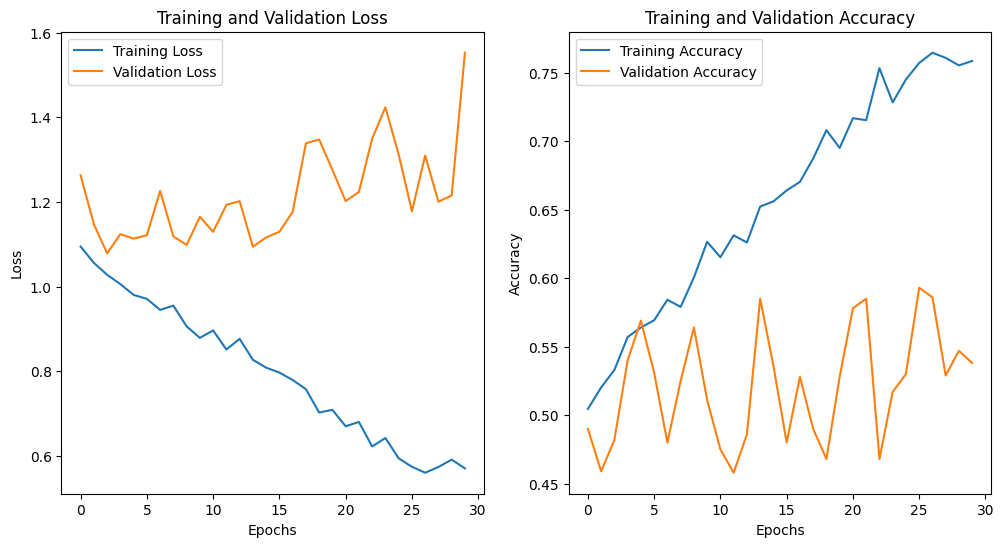

In [ ]:
import matplotlib.pyplot as plt

# Access the metrics stored in history.history
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot the loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot the accuracy
plt.subplot(1, 2, 2)
plt.plot(range(epochs), accuracy, label='Training Accuracy')
plt.plot(range(epochs), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization

# Define the input shape
np_shape = train_sc.shape[1:]

# Improved model
model = Sequential([
    Flatten(input_shape=np_shape),
    Dense(1024, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(8, Dense(8, activation='softmax'))  # Assuming 8 classes in the dataset
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
epochs = 30
history = model.fit(train_crhtds, epochs=epochs, verbose=1,
                     validation_data=test_crhtds)

Epoch 1/30
400/400 [==============================] - 86s 208ms/step - loss: 1.9968 - accuracy: 0.2998 - val_loss: 1.1550 - val_accuracy: 0.4510
Epoch 2/30
400/400 [==============================] - 85s 212ms/step - loss: 1.4725 - accuracy: 0.3915 - val_loss: 1.0370 - val_accuracy: 0.5480
Epoch 3/30
400/400 [==============================] - 85s 212ms/step - loss: 1.3477 - accuracy: 0.4275 - val_loss: 1.0760 - val_accuracy: 0.5300
Epoch 4/30
400/400 [==============================] - 84s 211ms/step - loss: 1.3074 - accuracy: 0.4325 - val_loss: 1.0719 - val_accuracy: 0.4780
Epoch 5/30
400/400 [==============================] - 90s 226ms/step - loss: 1.2990 - accuracy: 0.4412 - val_loss: 1.0035 - val_accuracy: 0.5550
Epoch 6/30
400/400 [==============================] - 86s 215ms/step - loss: 1.2500 - accuracy: 0.4580 - val_loss: 1.0304 - val_accuracy: 0.5720
Epoch 7/30
400/400 [==============================] - 83s 207ms/step - loss: 1.2755 - accuracy: 0.4417 - val_loss: 1.1416 - val_ac

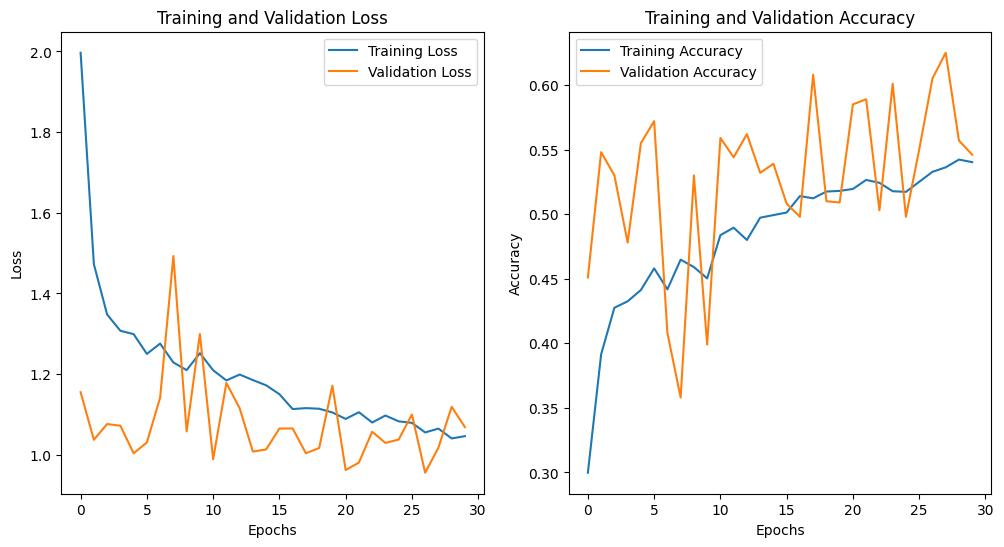

In [ ]:
import matplotlib.pyplot as plt

# Access the metrics stored in history.history
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot the loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot the accuracy
plt.subplot(1, 2, 2)
plt.plot(range(epochs), accuracy, label='Training Accuracy')
plt.plot(range(epochs), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

Test Loss: 1.0685606002807617
Test Accuracy: 0.5460000038146973


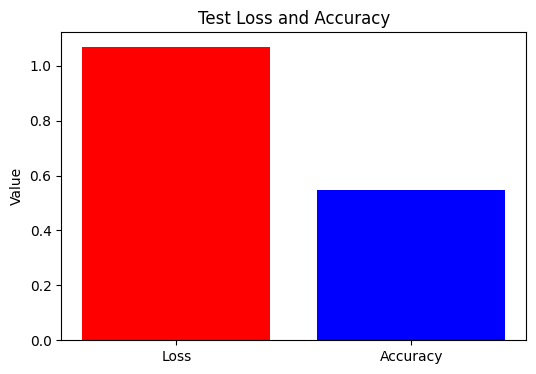

In [ ]:
import matplotlib.pyplot as plt

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_crhtds, verbose=0)

# Print the test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Plot the test data
plt.figure(figsize=(6, 4))
plt.bar(['Loss', 'Accuracy'], [test_loss, test_accuracy], color=['red', 'blue'])
plt.title('Test Loss and Accuracy')
plt.ylabel('Value')
plt.show()


100/100 [==============================] - 2s 17ms/step
Length of y_true: 1000
Length of y_pred_classes: 1000
Unique values in y_true: [0 1 2 3 4 5 6 7]
Unique values in y_pred_classes: [0 1 2 3 4 5 6 7]


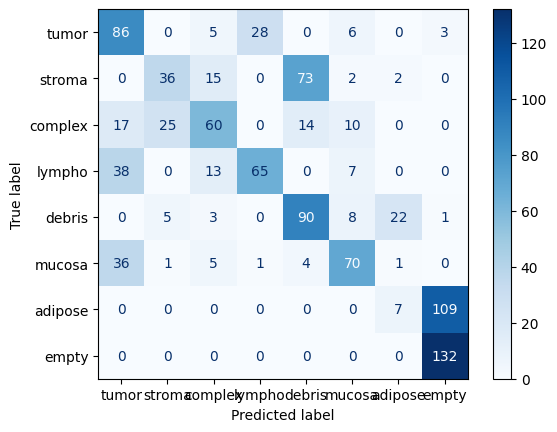

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming model and test_fm are already defined and loaded

# Make predictions on the test set
y_pred = model.predict(test_crhtds)
y_pred_classes = np.argmax(y_pred, axis=1)  # Use argmax to get the class with the highest probability

# Get true labels
y_true = np.concatenate([y.numpy() for x, y in test_crhtds], axis=0)

# Print lengths to confirm they match
print("Length of y_true:", len(y_true))
print("Length of y_pred_classes:", len(y_pred_classes))

# Check unique values
print("Unique values in y_true:", np.unique(y_true))
print("Unique values in y_pred_classes:", np.unique(y_pred_classes))

# Define class labels
classes = info.features['label'].names

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.show()

---
A. Modify this notebook to improve the performance of the model.
Conditions:

1. No more than 50 epochs
2. You can change the size and batch of the dataset.
3. Layers: as many as I want but I can only use flatten, dense, batchnormalization and dropouut.
4. You can also change the optimizer and the loss function, but not the metric.
5. Either way, be careful not to overflow memory.

---

#EXTRA

When the validation curves show high variability (sharp peaks and troughs), it suggests that the model may be overfitting or that the validation set may not be representative of the training set. Here are some strategies to smooth out the validation curves and improve your model's generalization:

### 1. Data Augmentation
Introduce data augmentation to increase the diversity of your training data by applying random transformations such as rotations, flips, and zooms. This can help the model generalize better.

```python
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(train_sc)
```

### 2. Increase Training Data
If possible, increase the size of your training dataset. More data can help the model learn better and generalize well.

### 3. Regularization
Add more regularization to your model to prevent overfitting. This can be done by adding dropout layers and/or increasing their dropout rates, and adding L2 regularization to the dense layers.

```python
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2

# Define the input shape
np_shape = train_sc.shape[1:]

# CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=np_shape, kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),

    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),

    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),

    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(8, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model with data augmentation
epochs = 50
history = model.fit(datagen.flow(train_sc, label_train, batch_size=32),
                    epochs=epochs, validation_split=0.2, verbose=1)
```

### 4. Reduce Learning Rate
A high learning rate can cause the model to converge too quickly to a suboptimal solution. Try reducing the learning rate.

```python
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
```

### 5. Early Stopping
Use early stopping to halt the training process when the validation performance stops improving.

```python
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(datagen.flow(train_sc, label_train, batch_size=32),
                    epochs=epochs, validation_split=0.2, verbose=1, callbacks=[early_stopping])
```

### 6. Stratified Split
Ensure the train-validation split is stratified, meaning that each set maintains the same class distribution. This can be done using scikit-learn’s `train_test_split`.

```python
from sklearn.model_selection import train_test_split

train_images, val_images, train_labels, val_labels = train_test_split(train_sc, label_train, test_size=0.2, stratify=label_train)

history = model.fit(datagen.flow(train_images, train_labels, batch_size=32),
                    epochs=epochs, validation_data=(val_images, val_labels), verbose=1, callbacks=[early_stopping])
```

### 7. Smoothing the Curves
Sometimes, even with these techniques, the validation curves may not be perfectly smooth. You can apply a moving average to smooth out the validation loss and accuracy curves for better visualization.

```python
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')

val_loss_avg = moving_average(history.history['val_loss'], window_size=5)
val_acc_avg = moving_average(history.history['val_accuracy'], window_size=5)

plt.plot(val_loss_avg, label='Validation Loss (smoothed)')
plt.plot(val_acc_avg, label='Validation Accuracy (smoothed)')
plt.legend()
plt.show()
```

These strategies can help in stabilizing the validation performance and improving the overall generalization of your model.

## Exercise

---
Modify the notebook as necessary to improve the performance parameters of a model you create. Try to use a metric that combines the partial metrics to show that your model classifies better than the baseline model shown in this notebook. What you can modify includes:

---

### Instructions to Improve the Notebook (invest about it by yourself):

ChatGPT can be your great allied. Use it for your convenence.

1. **Data Preprocessing**: Improve data preprocessing by normalizing the data, handling missing values. Only for curiosity, you can use Data Augmentation although it will be of our interes in later lectures.

2. **Model Architecture**: Modify the architecture of the model. Experiment with different layers, activation functions, or network structures (but no  Convolutional Neural Networks because it will be of our interes in later lectures, only deeper networks).

3. **Training Parameters**: Tune the training parameters such as learning rate, batch size, number of epochs, and optimization algorithms (e.g., Adam, SGD).

4. **Regularization Techniques**: Apply regularization techniques like dropout, L1/L2 regularization to prevent overfitting.

5. **Cross-Validation**: Use cross-validation to ensure that the model generalizes well to unseen data.

6. **Evaluation Metrics**: Use combined metrics such as the F1 score, Precision-Recall AUC, or Matthews Correlation Coefficient to get a more comprehensive evaluation of the model's performance. Matthews Correlation Coefficient??? [scikit-learn - Matthews Correlation Coefficient](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.matthews_corrcoef.html)

7. **Hyperparameter Tuning**: Perform hyperparameter tuning using GridSearchCV or RandomizedSearchCV.

### Example Additions to the Notebook: *(not sure to works)*

```python
# Improved Data Preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Assuming train_images and train_labels are defined
datagen.fit(train_images)

# Model Architecture Modification
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model with different optimizer and learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with data augmentation
history = model.fit(datagen.flow(train_images, train_labels, batch_size=32),
                    validation_data=(val_images, val_labels),
                    epochs=50)

# Evaluate using F1 Score
from sklearn.metrics import f1_score

y_pred = np.argmax(model.predict(val_images), axis=1)
f1 = f1_score(val_labels, y_pred, average='weighted')
print(f'F1 Score: {f1:.4f}')
```

### Questions for Students:

1. **Data Augmentation**:
   - Implement data augmentation techniques and observe the effect on the model’s performance. Compare the results with and without data augmentation. What is Data augmentation. Invest about it.

2. **Model Architecture**:
   - Experiment with different model architectures (e.g., adding more layers, changing activation functions) and evaluate their impact on the accuracy and F1 score. What is the F1 Score? Invest about it.

3. **Regularization**:
   - Apply different regularization techniques (e.g., dropout, L1/L2 regularization) to the model. How does regularization affect the performance and overfitting of the model?

4. **Hyperparameter Tuning**: (*Optative*)
   - Use GridSearchCV or RandomizedSearchCV to find the best hyperparameters for your model. Report the hyperparameters that give the best performance and the corresponding evaluation metrics.

By following these instructions and answering the questions, we will gain hands-on experience in improving model performance and understanding the importance of different machine learning techniques.